# Statistical Significance and Error Bars

Lecture 13 | CMU ANLP Spring 2026 | Instructor: Sean Welleck

Basics of evaluating model performance with confidence intervals and statistical significance testing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

### Setup

- $q_i$: question $i$
- $s_i$: score on question $i$
- $n$: number of evaluation questions

#### Scenario

Suppose we evaluate model A and model B on HumanEval. In this case, 

- $s_i$ is either 0 or 1 (incorrect or correct, based on test cases passing)
- $n$ is 164

In [6]:
mu_A = 0.86
mu_B = 0.86

n = 164

scores_A = np.random.binomial(1, mu_A, n)
scores_B = np.random.binomial(1, mu_B, n)

scores_A, scores_B

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1

### Standard error and confidence intervals

$$SE_{Bernoulli}=\sqrt{\bar s(1-\bar s)/n}$$

$$CI_{95\%}=\bar s \pm 1.96\times SE$$

In [7]:
mean_A = np.mean(scores_A)
mean_B = np.mean(scores_B)

mean_A, mean_B

(np.float64(0.8414634146341463), np.float64(0.8902439024390244))

In [9]:
se_A = np.sqrt(mean_A*(1.0-mean_A)/n)
se_B = np.sqrt(mean_B*(1.0-mean_B)/n)
se_A, se_B

(np.float64(0.02852071738082699), np.float64(0.024408826948108142))

In [10]:
ci_95_A = (mean_A-1.96*se_A, mean_A+1.96*se_A)
ci_95_B = (mean_B-1.96*se_B, mean_B+1.96*se_B)

ci_95_A, ci_95_B

((np.float64(0.7855628085677254), np.float64(0.8973640207005672)),
 (np.float64(0.8424026016207324), np.float64(0.9380852032573164)))

Look at the confidence intervals above; intuitively, do you think that we can conclude that one model is better than the other?

### Comparing models: unpaired analysis


In [13]:
mean_BA = mean_B - mean_A
se_BA = np.sqrt(se_A**2 +se_B**2)

z = mean_BA/se_BA
z

np.float64(1.299440529053058)

<img src="https://www.ztable.net/wp-content/uploads/2018/11/positiveztable.png" height=500px>

In [16]:
import scipy
scipy.stats.norm.cdf(z)

np.float64(0.9031036047966683)

Interpretation: the observed difference is `z` standard errors away from 0

In [17]:
p_z = 0.9031

p = 2*(1-p_z)
p

0.19379999999999997

Interpretation: if the two models truly have equal performance, then there is a `p`*100\% chance that we'd see the observed difference just due to sampling variability.

Example decision rule:
- `p < 0.05`: result is rare enough; reject the null hypothesis that the two models are equal. We say that the result is statistically significant (p = 0.05).
- `p > 0.05`: result isn't that rare; don't reject the null hypothesis that the two models' performances are equal. The difference could be noise.

In other words, `p=0.194` means that we do not have evidence that model B is actually better than model A.

### Comparing models: paired analysis

In [21]:
mean_AB = mean_A - mean_B

temp = 0
for sa, sb in zip(scores_A, scores_B):
    sab = sa - sb
    temp += ((sab - mean_AB)**2)

se_paired = np.sqrt(((1/(n-1))*temp)/n)
se_BA, se_paired

(np.float64(0.037539607788304036), np.float64(0.03438704414581275))

In [23]:
z_paired = mean_AB/se_paired
p_z_paired = scipy.stats.norm.cdf(z_paired)
p_paired = 2*(1-p_z_paired)
p_paired


np.float64(1.8439760797588902)

### Effect of dataset size on standard error

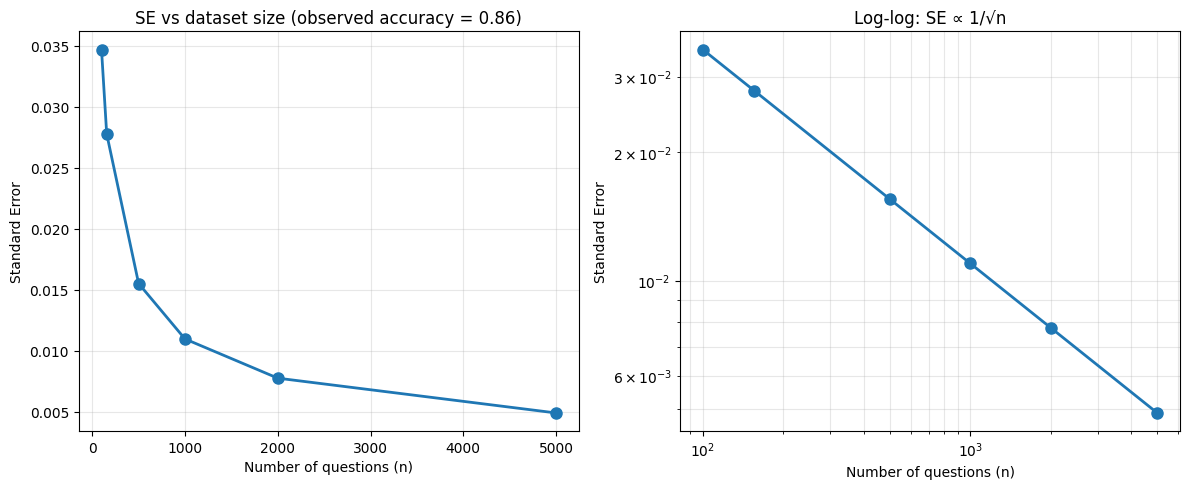

n=  100: SE=0.0347
n=  156: SE=0.0278
n=  500: SE=0.0155
n= 1000: SE=0.0110
n= 2000: SE=0.0078
n= 5000: SE=0.0049


In [28]:
observed_accuracy = 0.86

dataset_sizes = [100, 156, 500, 1000, 2000, 5000]

ses = [np.sqrt(observed_accuracy * (1-observed_accuracy)/n) for n in dataset_sizes]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear scale
ax1.plot(dataset_sizes, ses, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of questions (n)')
ax1.set_ylabel('Standard Error')
ax1.set_title(f'SE vs dataset size (observed accuracy = {observed_accuracy})')
ax1.grid(True, alpha=0.3)

# Log-log scale
ax2.plot(dataset_sizes, ses, 'o-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of questions (n)')
ax2.set_ylabel('Standard Error')
ax2.set_title('Log-log: SE ∝ 1/√n')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

for n, se in zip(dataset_sizes, ses):
    print(f"n={n:5d}: SE={se:.4f}")

In [29]:
# Check the slope
log_n = np.log(dataset_sizes)
log_se = np.log(ses)

# Fit a line: log(SE) = a + b*log(n)
slope, intercept = np.polyfit(log_n, log_se, 1)

print(f"Slope from data: {slope:.4f}")
print(f"\nInterpretation: doubling n reduces SE by a factor of {2**(-slope):.3f}")

Slope from data: -0.5000

Interpretation: doubling n reduces SE by a factor of 1.414
